# GeocodersComparison
## This notebook shows how to obtain the data and visualizations for the comparison of four geocoding services (defined in ```setting.py```)

# Module ```GeocodersComparison``` has the preset query list, geocoders, and other global variables and functions used in the comparison.

### See the ```settings``` module for details.

In [1]:
import GeocodersComparison as GeoComp4


Places queried, var query_lst:
['New York City, NY, USA', "Cleopatra's needle, Central Park, New York, NY, USA", 'Bronx county, NY, USA', 'Kings county, NY, USA', 'New York county, NY, USA', 'Queens county, NY, USA', 'Richmond county, NY, USA', 'Boston, MA, USA']

Fetching API keys from environment file if found.

GOOGLE_KEY & AZURE_KEY assigned from local .env file.


Fetching geodata...
Found : .\geodata\geodata_Nom.json, 5 days, 0h 23m 4s old
Found : .\geodata\geodata_Goo.json, 5 days, 0h 22m 58s old
Found : .\geodata\geodata_Arc.json, 5 days, 0h 22m 53s old
Found : .\geodata\geodata_Azu.json, 5 days, 0h 22m 51s old

All geodata variables gathered into list geo_dicts.

The var places will be used for retrieving the geodata and the distance comparison for a particular place:
 ['New York City', "Cleopatra's needle", 'Bronx county', 'Kings county', 'New York county', 'Queens county', 'Richmond county', 'Boston']

The geolocation data and distance calculations dataframes of each places

In [2]:
import os

import pandas as pd
import numpy as np

%matplotlib inline
from IPython.display import display_html, display, Image
from IPython.display import HTML

## Assign variables to objects from GeocodersComparison module

In [3]:
query_lst = GeoComp4.query_lst
geocs = GeoComp4.geocs
places = GeoComp4.places
geo_dicts = GeoComp4.geo_dicts
colors_dict = GeoComp4.colors_dict
df_dict = GeoComp4.df_dict  #get_df_dict(geocs, geo_dicts, places)

boro_to_county = GeoComp4.boro_to_county
places_to_boros = GeoComp4.places_to_boros

# geodfs from shapefiles:
gdf_nyc_counties = GeoComp4.gdf_nyc_counties
gdf_boston = GeoComp4.gdf_boston

# Directories:
dir_geo = GeoComp4.DIR_GEO
dir_html = GeoComp4.DIR_HTML
dir_img = GeoComp4.DIR_IMG

# Obtain the dataframes for the location and box center coordinates, and for the NYC vs. NY county comparison:

In [4]:
df_comp_loc_box = GeoComp4.compare_location_with_geobox(places, geocs, geo_dicts)
df_comp_loc_box

,Nominatim,GoogleV3,ArcGis,AzureMaps
Location is box center?,,,,
New York City,False,False,True,False
Cleopatra's needle,True,True,True,False
Bronx county,True,False,True,False
Kings county,False,False,True,False
New York county,False,False,True,False
Queens county,False,False,True,False
Richmond county,False,False,True,False
Boston,False,False,True,False


In [5]:
df_comp_2boxes = GeoComp4.compare_two_geoboxes(places[0], places[4], geocs, geo_dicts)
df_comp_2boxes

,Identical
,bounding boxes?
New York City & New York county:,
Nominatim,False
GoogleV3,True
ArcGis,True
AzureMaps,True


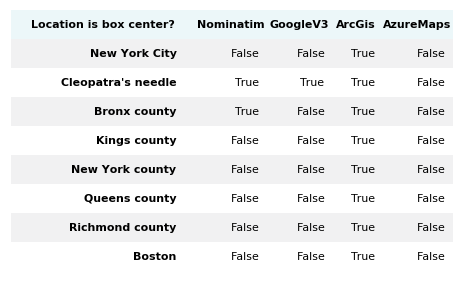

In [6]:
outfile = os.path.join(dir_img, 'comp_Loc_center_tbl')

df = df_comp_loc_box.reset_index()
GeoComp4.df_to_pic(df, save_tbl_name=outfile, squeeze_factor=7, show=True);

![Table 1](./images/comp_Loc_center_tbl.svg)

In [8]:
outfile = os.path.join(dir_img, 'comp_NYC_NYcnty_tbl')

df2 = df_comp_2boxes.reset_index()  # multi index: pass new cols
new_cols = ['New York City &\nNew York county', 'Identical\nbounding boxes?']

GeoComp4.df_to_pic(df2, save_tbl_name=outfile, new_col_names=new_cols, squeeze_factor=12);

![Table 2](./images/comp_NYC_NYcnty_tbl.svg)

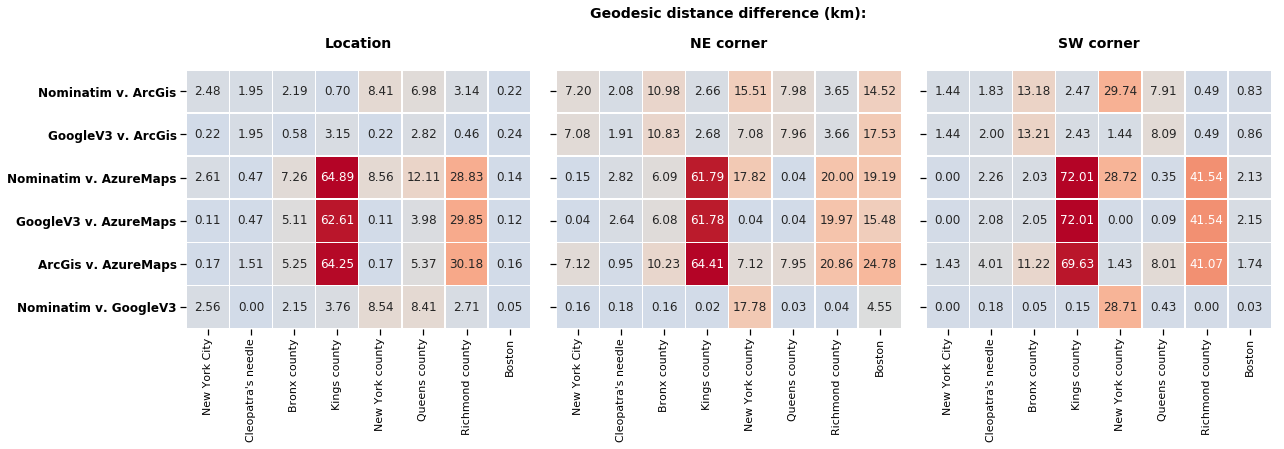

In [9]:
# Distance in kilometers
GeoComp4.get_geo_dist_heatmap(places, df_dict)

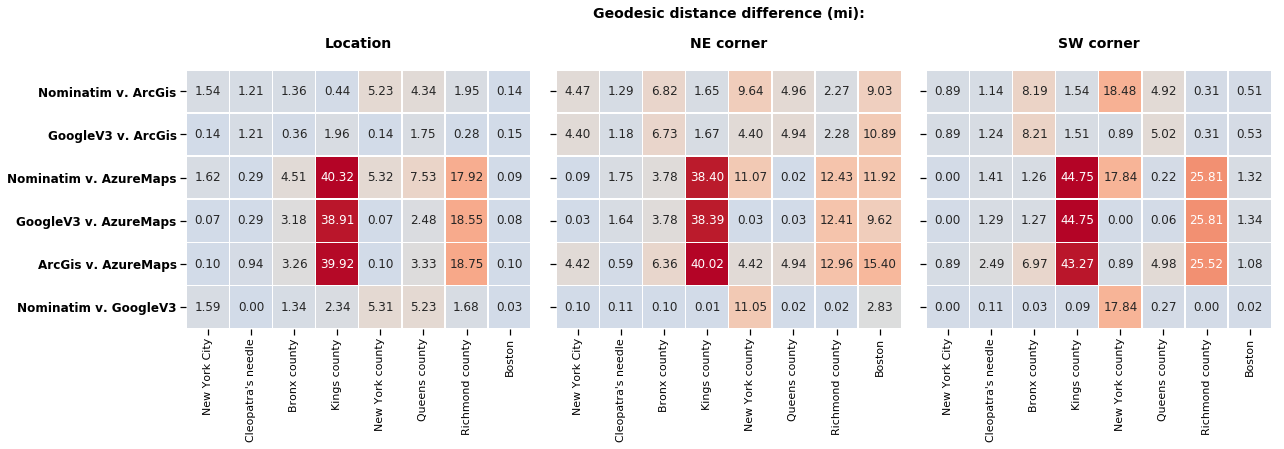

In [10]:
# Distance in miles:
GeoComp4.get_geo_dist_heatmap(places, df_dict, unit='mi')

### Assignment examples for retrieving the geo coordinates and distance difference dataframe for each place:
```python
nyc_df, dist_nyc_df = df_dict[places[0]][0], df_dict[places[0]][1]
cleo_df, dist_cleo_df = df_dict[places[1]][0], df_dict[places[1]][1]
bx_df, dist_bx_df = df_dict[places[2]][0], df_dict[places[2]][1]
bk_df, dist_bk_df = df_dict[places[3]][0], df_dict[places[3]][1]
ny_df, dist_ny_df = df_dict[places[4]][0], df_dict[places[4]][1]
qn_df, dist_qn_df = df_dict[places[5]][0], df_dict[places[5]][1]
si_df, dist_si_df = df_dict[places[6]][0], df_dict[places[6]][1]
bos_df, dist_bos_df = df_dict[places[7]][0], df_dict[places[7]][1]
```

# New York City

### Retrieve data from dict of dataframes:

In [11]:
nyc_df, dist_nyc_df = df_dict[places[0]][0], df_dict[places[0]][1]
nyc_df

,"lat, lon",NE,SW
New York City,,,
Nominatim,"[40.7308619, -73.9871558]","[40.9161785, -73.7001809]","[40.477399, -74.25909]"
GoogleV3,"[40.7127753, -74.0059728]","[40.9175771, -73.70027209999999]","[40.4773991, -74.25908989999999]"
ArcGis,"[40.71455000000003, -74.00713999999994]","[40.96455000000003, -73.75713999999994]","[40.46455000000003, -74.25713999999994]"
AzureMaps,"[40.71305, -74.00723]","[40.9175, -73.69979]","[40.47738, -74.25909]"


### Apply the GeoComp4.with_style function to the distance difference dataframe to obtain the highlighted min and max of each column:

In [12]:
df_disp = display(GeoComp4.with_style(dist_nyc_df))

# Cleopatra's needle - an ancient Egyptian monumnet in Central Park:

In [13]:
cleo_df, dist_cleo_df = df_dict[places[1]][0], df_dict[places[1]][1]
cleo_df

,"lat, lon",NE,SW
Cleopatra's needle,,,
Nominatim,"[40.77963585, -73.96539645]","[40.779683, -73.96533289999999]","[40.7795887, -73.96546]"
GoogleV3,"[40.7796358, -73.9653964]","[40.7809847802915, -73.9640474197085]","[40.77828681970851, -73.96674538029151]"
ArcGis,"[40.7964784531607, -73.95881019345023]","[40.7974784531607, -73.95781019345023]","[40.795478453160705, -73.95981019345024]"
AzureMaps,"[40.78384, -73.96555]","[40.80124, -73.94765]","[40.76359, -73.98207]"


In [14]:
display(GeoComp4.with_style(dist_cleo_df))

In [15]:
p = places[0]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, filter_bounds=False, zoom=9.5, colors_d=colors_dict)

New York City Manhattan


# New York county | Manhattan 

In [16]:
p = places[4]
boro = places_to_boros[p]
print(p, boro)

df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, colors_d=colors_dict)

New York county Manhattan


# Cleopatra's needle in Central Park

In [17]:
p = places[1]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, zoom=12, colors_d=colors_dict)

Cleopatra's needle Manhattan


In [18]:
p = places[1]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
map_cleo = GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, zoom=17, colors_d=colors_dict, file_suffix='zoomed')
map_cleo

Cleopatra's needle Manhattan


# Bronx

In [19]:
p = places[2]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties,colors_d=colors_dict)

Bronx county Bronx


# Brooklyn

In [20]:
p = places[3]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, colors_d=colors_dict)

Kings county Brooklyn


# Queens

In [21]:
p = places[5]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, colors_d=colors_dict)

Queens county Queens


# Richmond county | Staten Island

In [22]:
p = places[6]
boro = places_to_boros[p]
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_nyc_counties, colors_d=colors_dict)

Richmond county Staten Island


# Boston (may not display in notebook, but will likely be correctly saved (size issue?))

In [23]:
p = places[7]
boro = 'B'
print(p, boro)
df = df_dict[p][0]
GeoComp4.get_boro_maps(boro, df, gdf_boston, filter_bounds=False, zoom=10, colors_d=colors_dict)

Boston B


# Finally, here is something else I learned: 
# How to estimate the resolution distance using the decimal portion of a decimal degree

#### Note: this is always going to be an estimate because of this simplification: 
> meters per degree of latitude = meters per degree of longitude

#### Hence, this is an "eyeball" estimate.

* See this excellent resource on precision for geolocations:
    https://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude

**Excerpts from Whuber**:
>. The first decimal place is worth up to 11.1 km: it can distinguish the position of one large city from a neighboring large city.<br>
>. The second decimal place is worth up to 1.1 km: it can separate one village from the next.<br>
>. The third decimal place is worth up to 110 m: it can identify a large agricultural field or institutional campus.<br>
. The fourth decimal place is worth up to 11 m: it can identify a parcel of land. It is comparable to the typical accuracy of an uncorrected GPS unit with no interference.<br>
. The fifth decimal place is worth up to 1.1 m: it distinguish trees from each other. Accuracy to this level with commercial GPS units can only be achieved with differential correction.<br>
. The sixth decimal place is worth up to 0.11 m: you can use this for laying out structures in detail, for designing landscapes, building roads. It should be more than good enough for tracking movements of glaciers and rivers. This can be achieved by taking painstaking measures with GPS, such as differentially corrected GPS.<br>
. The seventh decimal place is worth up to 11 mm: this is good for much surveying and is near the limit of what GPS-based techniques can achieve.<br>
. The eighth decimal place is worth up to 1.1 mm: this is good for charting motions of tectonic plates and movements of volcanoes. Permanent, corrected, constantly-running GPS base stations might be able to achieve this level of accuracy.<br>
. The ninth decimal place is worth up to 110 microns: we are getting into the range of microscopy. For almost any conceivable application with earth positions, this is overkill and will be more precise than the accuracy of any surveying device.<br>
. Ten or more decimal places indicates a computer or calculator was used and that no attention was paid to the fact that the extra decimals are useless. Be careful, because unless you are the one reading these numbers off the device, this can indicate low quality processing!

# Call for additional comparisons: it would be nice to have a complete set!
### At the time of this writing, there are (only) 47 geocoding services listed in geopy:

In [24]:
import geopy.geocoders

geocoders_in_geopy = [g for g in dir(geopy.geocoders) if not g.startswith('_')]
print('Total:', len(geocoders_in_geopy))

#geocoders_in_geopy
pairwise_comparison_names = GeoComp4.get_paiwise_names(geocoders_in_geopy)
print('Number of pairwise comparisons:', len(pairwise_comparison_names))

Total: 47
Number of pairwise comparisons: 1081
